# Programa Mujeres en Data Science

In [1]:
import emoji

## ✏️ Ejercitación: Aprendizaje Supervisado

Esta notebook integra conceptos básicos de Pandas 🐼 , Analisis Exploratorio, Procesamiento de datos 📊 y aprendizaje automatico. 

El primer dataset contiene sobre [cancer de mamá](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer) y es adecuado para problemas de clasificación. El segundo dataset contiene datos sobre [venta de autos](https://www.kaggle.com/sanskrutipanda/car-pricing-prediction) y es adecuado para problemas de regresión.

El objetivo de este projecto es ajustar modelos de regresión y clasificación para elegir aquel que mejor desempeño tuvo (para cada tipo de problema).

Como son datasets nuevos se comienza el análisis desde zero. Primero se realiza un análisis exploratorio y el correspondiente procesamiento y transformación de los datos. El análisis exploratorio permite hacernos preguntas sobre los datos y poder luego, elegir que modelos es posible ajustar según que variable deseas predecir y las caracteristicas de las variables independendientes.


### 🚀 👩🏽‍💻 Aprendizaje Supervisado 📣

### 1) Clasificación 🟢 🟣 🟡

### 🔬 Análisis Exploratorio 🎉 

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
cancer_mamario = pd.read_csv('cancer_mamario.csv', delimiter=',')

### 🛠 Procesamiento y transformación de datos 🔧

In [4]:
cancer_mamario.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
cancer_mamario.tail(20)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
266,recurrence-events,40-49,premeno,30-34,3-5,yes,2,left,right_up,no
267,recurrence-events,60-69,ge40,20-24,24-26,yes,3,left,left_low,yes
268,recurrence-events,30-39,premeno,35-39,0-2,no,3,left,left_low,no
269,recurrence-events,40-49,premeno,25-29,0-2,no,2,left,left_low,yes
270,recurrence-events,50-59,ge40,30-34,6-8,yes,3,left,right_low,no
271,recurrence-events,50-59,premeno,25-29,0-2,no,3,right,left_low,yes
272,recurrence-events,40-49,premeno,15-19,0-2,yes,3,right,left_up,no
273,recurrence-events,60-69,ge40,30-34,0-2,yes,2,right,right_up,yes
274,recurrence-events,60-69,ge40,30-34,3-5,yes,2,left,central,yes
275,recurrence-events,40-49,premeno,25-29,9-11,yes,3,right,left_up,no


In [6]:
cancer_mamario.shape

(286, 10)

In [7]:
cancer_mamario.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [8]:
cancer_mamario.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [9]:
cancer_mamario.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [10]:
#valores nulos
cancer_mamario.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [11]:
#transformacion de variables categoricas
#Age
cancer_mamario["30-39"] = cancer_mamario.age.apply(lambda x: 0 if x == "30-39" else 1)
cancer_mamario["40-49"] = cancer_mamario.age.apply(lambda x: 0 if x == "40-49" else 1)
cancer_mamario["50-59"] = cancer_mamario.age.apply(lambda x: 0 if x == "50-59" else 1)
cancer_mamario["60-69"] = cancer_mamario.age.apply(lambda x: 0 if x == "60-69" else 1)
cancer_mamario.drop('age', axis=1, inplace=True)
cancer_mamario.head()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,30-39,40-49,50-59,60-69
0,no-recurrence-events,premeno,30-34,0-2,no,3,left,left_low,no,0,1,1,1
1,no-recurrence-events,premeno,20-24,0-2,no,2,right,right_up,no,1,0,1,1
2,no-recurrence-events,premeno,20-24,0-2,no,2,left,left_low,no,1,0,1,1
3,no-recurrence-events,ge40,15-19,0-2,no,2,right,left_up,no,1,1,1,0
4,no-recurrence-events,premeno,0-4,0-2,no,2,right,right_low,no,1,0,1,1


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
#transformacion de variables categoricas
#class
test_encoder = LabelEncoder()
class_encoder = LabelEncoder()
cancer_mamario.loc[:, 'class'] = class_encoder.fit_transform(cancer_mamario['class'])
cancer_mamario.head()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,30-39,40-49,50-59,60-69
0,0,premeno,30-34,0-2,no,3,left,left_low,no,0,1,1,1
1,0,premeno,20-24,0-2,no,2,right,right_up,no,1,0,1,1
2,0,premeno,20-24,0-2,no,2,left,left_low,no,1,0,1,1
3,0,ge40,15-19,0-2,no,2,right,left_up,no,1,1,1,0
4,0,premeno,0-4,0-2,no,2,right,right_low,no,1,0,1,1


In [14]:
cancer_mamario.tail()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,30-39,40-49,50-59,60-69
281,1,premeno,30-34,0-2,no,2,left,left_up,no,0,1,1,1
282,1,premeno,20-24,0-2,no,3,left,left_up,yes,0,1,1,1
283,1,ge40,20-24,0-2,no,1,right,left_up,no,1,1,1,0
284,1,ge40,30-34,3-5,no,3,left,left_low,no,1,0,1,1
285,1,ge40,30-34,3-5,no,3,left,left_low,no,1,1,0,1


In [15]:
#transformacion de variables categoricas
#menopause
class_encoder = LabelEncoder()
cancer_mamario.loc[:, 'menopause'] = class_encoder.fit_transform(cancer_mamario['menopause'])
cancer_mamario.head()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,30-39,40-49,50-59,60-69
0,0,2,30-34,0-2,no,3,left,left_low,no,0,1,1,1
1,0,2,20-24,0-2,no,2,right,right_up,no,1,0,1,1
2,0,2,20-24,0-2,no,2,left,left_low,no,1,0,1,1
3,0,0,15-19,0-2,no,2,right,left_up,no,1,1,1,0
4,0,2,0-4,0-2,no,2,right,right_low,no,1,0,1,1


In [16]:
#transformacion de variables categoricas
#tumor-size
class_encoder = LabelEncoder()
cancer_mamario.loc[:, 'tumor-size'] = class_encoder.fit_transform(cancer_mamario['tumor-size'])
cancer_mamario.head()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,30-39,40-49,50-59,60-69
0,0,2,5,0-2,no,3,left,left_low,no,0,1,1,1
1,0,2,3,0-2,no,2,right,right_up,no,1,0,1,1
2,0,2,3,0-2,no,2,left,left_low,no,1,0,1,1
3,0,0,2,0-2,no,2,right,left_up,no,1,1,1,0
4,0,2,0,0-2,no,2,right,right_low,no,1,0,1,1


In [17]:
cancer_mamario.tail()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,30-39,40-49,50-59,60-69
281,1,2,5,0-2,no,2,left,left_up,no,0,1,1,1
282,1,2,3,0-2,no,3,left,left_up,yes,0,1,1,1
283,1,0,3,0-2,no,1,right,left_up,no,1,1,1,0
284,1,0,5,3-5,no,3,left,left_low,no,1,0,1,1
285,1,0,5,3-5,no,3,left,left_low,no,1,1,0,1


In [18]:
#transformacion de variables categoricas
#irradiat
cancer_mamario["no_irradiat"] = cancer_mamario.irradiat.apply(lambda x: 0 if x == "no" else 1)
cancer_mamario["yes_irradiat"] = cancer_mamario.irradiat.apply(lambda x: 0 if x == "yes" else 1)
cancer_mamario.drop('irradiat', axis=1, inplace=True)
cancer_mamario.head()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,30-39,40-49,50-59,60-69,no_irradiat,yes_irradiat
0,0,2,5,0-2,no,3,left,left_low,0,1,1,1,0,1
1,0,2,3,0-2,no,2,right,right_up,1,0,1,1,0,1
2,0,2,3,0-2,no,2,left,left_low,1,0,1,1,0,1
3,0,0,2,0-2,no,2,right,left_up,1,1,1,0,0,1
4,0,2,0,0-2,no,2,right,right_low,1,0,1,1,0,1


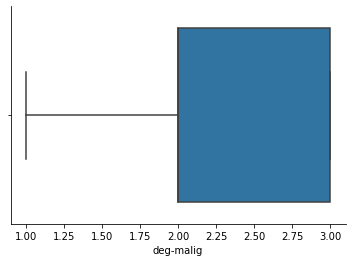

In [19]:
#detección de outliers
#deg-malig
sns.boxplot(x=cancer_mamario['deg-malig'])
sns.despine()

In [20]:
cancer_mamario.to_csv('cancer_limpio.csv', index=False)

#### Seleccion de target (y) y variables (X)

In [21]:
cancer = pd.read_csv('cancer_limpio.csv', delimiter=',')

In [22]:
cancer.head()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,30-39,40-49,50-59,60-69,no_irradiat,yes_irradiat
0,0,2,5,0-2,no,3,left,left_low,0,1,1,1,0,1
1,0,2,3,0-2,no,2,right,right_up,1,0,1,1,0,1
2,0,2,3,0-2,no,2,left,left_low,1,0,1,1,0,1
3,0,0,2,0-2,no,2,right,left_up,1,1,1,0,0,1
4,0,2,0,0-2,no,2,right,right_low,1,0,1,1,0,1


In [23]:
cancer.tail()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,30-39,40-49,50-59,60-69,no_irradiat,yes_irradiat
281,1,2,5,0-2,no,2,left,left_up,0,1,1,1,0,1
282,1,2,3,0-2,no,3,left,left_up,0,1,1,1,1,0
283,1,0,3,0-2,no,1,right,left_up,1,1,1,0,0,1
284,1,0,5,3-5,no,3,left,left_low,1,0,1,1,0,1
285,1,0,5,3-5,no,3,left,left_low,1,1,0,1,0,1


#### Separando Train / Test

PREGUNTAS DE ANÁLISIS:
¿Qué tamaño de tumor califica como maligno?

Para eso creo una nueva variable que indique según tumor -size y deg-malig si es maligno o no

In [24]:
# variable que Promedie tumor-size y deg-malig
cancer['malig'] = (cancer['deg-malig'] + cancer['tumor-size']) / 3
cancer.head()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,30-39,40-49,50-59,60-69,no_irradiat,yes_irradiat,malig
0,0,2,5,0-2,no,3,left,left_low,0,1,1,1,0,1,2.666667
1,0,2,3,0-2,no,2,right,right_up,1,0,1,1,0,1,1.666667
2,0,2,3,0-2,no,2,left,left_low,1,0,1,1,0,1,1.666667
3,0,0,2,0-2,no,2,right,left_up,1,1,1,0,0,1,1.333333
4,0,2,0,0-2,no,2,right,right_low,1,0,1,1,0,1,0.666667


In [25]:
#creo una etiqieta donde malig <=1 (no es maligno)/deg-malig >=1 (es maligno)
cancer['maligSi'] = cancer['malig'].apply(lambda x: 0 if x <=1 else 1)
cancer.head()

,class,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,30-39,40-49,50-59,60-69,no_irradiat,yes_irradiat,malig,maligSi
0,0,2,5,0-2,no,3,left,left_low,0,1,1,1,0,1,2.666667,1
1,0,2,3,0-2,no,2,right,right_up,1,0,1,1,0,1,1.666667,1
2,0,2,3,0-2,no,2,left,left_low,1,0,1,1,0,1,1.666667,1
3,0,0,2,0-2,no,2,right,left_up,1,1,1,0,0,1,1.333333,1
4,0,2,0,0-2,no,2,right,right_low,1,0,1,1,0,1,0.666667,0


In [26]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x.
x = cancer.drop(['tumor-size', 'deg-malig', 'malig', 'maligSi','inv-nodes', 'node-caps', 'breast', 'breast-quad'], axis=1)
x.head()

,class,menopause,30-39,40-49,50-59,60-69,no_irradiat,yes_irradiat
0,0,2,0,1,1,1,0,1
1,0,2,1,0,1,1,0,1
2,0,2,1,0,1,1,0,1
3,0,0,1,1,1,0,0,1
4,0,2,1,0,1,1,0,1


In [27]:
lista_atributos = x.columns #sirve para guardar las columnas que elimine

In [28]:
y = cancer['maligSi'] #guardo la etiqueta

In [29]:
x, y = np.array(x), np.array(y) #guardo la x y la y en un array

In [30]:
x

array([[0, 2, 0, ..., 1, 0, 1],
       [0, 2, 1, ..., 1, 0, 1],
       [0, 2, 1, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 0, 1]], dtype=int64)

In [31]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=42)

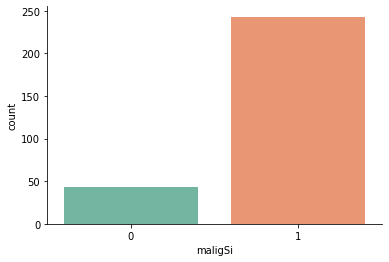

In [34]:
sns.countplot(x=cancer['maligSi'], palette='Set2')
sns.despine()

In [35]:
cancer['maligSi'].value_counts() / cancer['maligSi'].size * 100

1    84.965035
0    15.034965
Name: maligSi, dtype: float64

#### Clasificador KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
from sklearn.model_selection import GridSearchCV

In [38]:
# metricas
from sklearn.metrics import (
    roc_curve, 
    accuracy_score, 
    roc_auc_score,
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score
)

In [39]:
knn = KNeighborsClassifier()

In [40]:
# Entrenamos el modelo
knn.fit(X_train, y_train); 

In [41]:
# Predecimos 
predicciones_cla = knn.predict(X_test)

In [42]:
predicciones_train = knn.predict(X_train)

In [43]:
accuracy = accuracy_score(y_train, predicciones_train)*100
print(f'{round(accuracy, 2)}%')

77.19%


In [44]:
accuracy = accuracy_score(y_test, predicciones_cla)*100
print(f'{round(accuracy, 2)}%')

74.14%


In [45]:
# Optimizar parametros
ACC_train = []
ACC_test = []
vecinos = [1, 3, 5, 10, 15, 20, 25, 30]
for n in vecinos:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    ACC_train.append(train_acc)
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    ACC_test.append(test_acc)

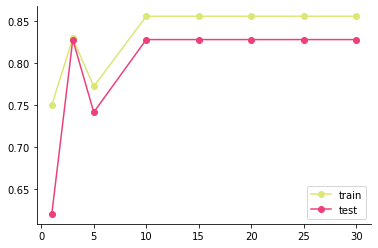

In [46]:
plt.plot(vecinos,ACC_train,'o-',label='train', color='#DCE775')
plt.plot(vecinos,ACC_test,'o-',label='test', color='#EC407A')
plt.legend()
sns.despine();

In [47]:
#Optimizó parametros con GridSerchCV
param_grid_vec = {
    'n_neighbors': [4, 5, 10, 15, 20, 25, 30],
    'weights': ['uniform','distance'],
    'metric': ['euclidean', 'manhattan'],
}

In [48]:
knn_search = KNeighborsClassifier()

In [49]:
vecinos_search = GridSearchCV(estimator=knn_search, param_grid=param_grid_vec,
                         cv=3, verbose=2, n_jobs=-1)

In [50]:
vecinos_search.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:   13.7s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [4, 5, 10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [51]:
# Buscó los Mejores hiperparametros
vecinos_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}

In [52]:
#Entrenó el modelo final
knn_best = KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='uniform')
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [53]:
new_predictions = knn_best.predict(X_test)

#### Clasificador RandomForest

In [54]:
# Valores para los parametros a optimizar
param_grid_vec_random = {
    'max_features': ['auto', 'sqrt', 'log2', None], 
    'max_depth': [2, 3, 4, 8, 10],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'n_estimators': [10, 15, 20, 30, 50, 100]

}

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
random_forest = RandomForestClassifier()

In [57]:
rf_search = GridSearchCV(estimator=random_forest, param_grid=param_grid_vec_random,
                         cv=3, verbose=2, n_jobs=-1)

In [58]:
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   32.4s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [10, 15, 20, 30, 50, 100]},
             verbose=2)

In [59]:
# Mejores hiperparametros
rf_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 10}

Entrenó modelo final

In [60]:
rf_best = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, max_features='auto', n_estimators=10)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [61]:
new_predictions_rf = rf_best.predict(X_test)

#### Evaluación de los modelos
Matriz de Confusión de KNeighborsClassifier

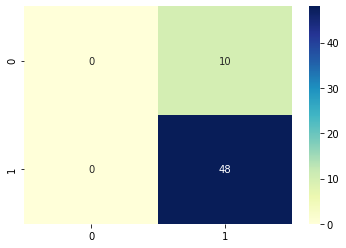

In [62]:
plt.figure()
random_confusion = confusion_matrix(y_test, new_predictions)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

In [63]:
print(f"Accuracy: {accuracy_score(y_test, new_predictions)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, new_predictions)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, new_predictions)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, new_predictions)*100 :.2f}%")

Accuracy: 82.76%
Precision: 82.76%
Recall: 100.00%
F1 score: 90.57%


Matriz de Confusión de RF

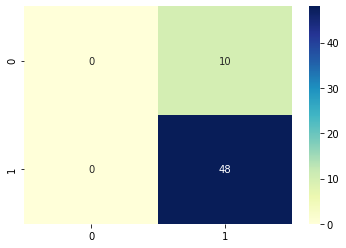

In [64]:
plt.figure()
random_confusion = confusion_matrix(y_test, new_predictions_rf)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

In [65]:
print(f"Accuracy: {accuracy_score(y_test, new_predictions_rf)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, new_predictions_rf)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, new_predictions_rf)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, new_predictions_rf)*100 :.2f}%")

Accuracy: 82.76%
Precision: 82.76%
Recall: 100.00%
F1 score: 90.57%


### 2) Regresión 1️⃣ 2️⃣

### 🔬 Análisis Exploratorio 🎉 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [42]:
venta_autos = pd.read_csv('venta_autos.csv', delimiter=',')

In [68]:
venta_autos.head ()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [69]:
venta_autos.shape

(50001, 19)

In [70]:
venta_autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [71]:
venta_autos.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

In [72]:
venta_autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


### 🛠 Procesamiento y transformación de datos 🔧

In [43]:
#Eliminación de columnas
venta_autos.drop('dateCrawled', axis=1, inplace=True)

In [44]:
venta_autos.drop('name', axis=1, inplace=True)

In [45]:
venta_autos.drop('seller', axis=1, inplace=True)

In [46]:
venta_autos.drop('offerType', axis=1, inplace=True)

In [47]:
venta_autos.drop('monthOfRegistration', axis=1, inplace=True) 

In [48]:
venta_autos.drop('dateCreated', axis=1, inplace=True)

In [49]:
venta_autos.drop('postalCode', axis=1, inplace=True)

In [50]:
venta_autos.drop('lastSeen', axis=1, inplace=True)

DATOS NULOS

In [81]:
venta_autos.isnull().sum()

price                    0
abtest                   0
vehicleType           5188
yearOfRegistration       0
gearbox               2824
powerPS                  0
model                 2758
kilometer                0
fuelType              4503
brand                    0
notRepairedDamage     9716
dtype: int64

In [82]:
venta_autos.isna().sum()/venta_autos.shape[0] * 100

price                  0.000000
abtest                 0.000000
vehicleType           10.375792
yearOfRegistration     0.000000
gearbox                5.647887
powerPS                0.000000
model                  5.515890
kilometer              0.000000
fuelType               9.005820
brand                  0.000000
notRepairedDamage     19.431611
dtype: float64

In [51]:
# Eliminar columna vehicleType (no se considera relevante)
venta_autos.drop('vehicleType', axis=1, inplace=True)

In [52]:
#Eliminar columna notRepairedDamage
venta_autos.drop('notRepairedDamage', axis=1, inplace=True)

In [53]:
#Eliminar filas casos nulos gearbox
venta_autos.dropna(subset=['model', 'gearbox', 'fuelType'], how='any',inplace=True)

In [86]:
venta_autos.isnull().sum()

price                 0
abtest                0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
dtype: int64

In [87]:
venta_autos.shape

(42393, 9)

#### Seleccion de target (y) y variables (X)

VARIABLE TARGET PRICE

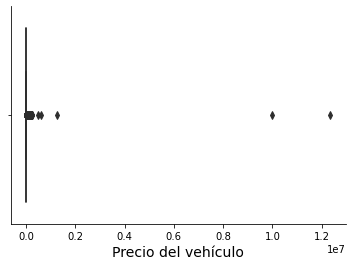

In [88]:
# boxplot
sns.boxplot(x=venta_autos['price'], color='#311982')
plt.xlabel('Precio del vehículo', size=14)
sns.despine()

In [89]:
venta_autos['price'].describe()

count    4.239300e+04
mean     6.709946e+03
std      7.794858e+04
min      0.000000e+00
25%      1.350000e+03
50%      3.350000e+03
75%      7.800000e+03
max      1.234568e+07
Name: price, dtype: float64

In [90]:
#Dado que hay presencia de valores 0 que pueden complicar el análisis, se eliminan
venta_autos = venta_autos[venta_autos['price'] != 0].reset_index(drop=True)

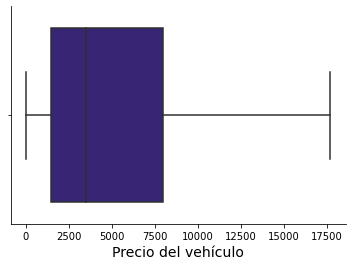

In [91]:
#analizo que tipo de distribución es (sin outliers)
# boxplot
sns.boxplot(x=venta_autos['price'], color='#311982', showfliers=False)
plt.xlabel('Precio del vehículo', size=14)
sns.despine()

In [92]:
#aplicó rango intercuartilico teniendo en cuenta que no es una distribución normal
q1 = venta_autos['price'].quantile(0.25)
q3 = venta_autos['price'].quantile(0.75)
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [93]:
venta_autos = venta_autos[(venta_autos['price'] > lb) & (venta_autos['price'] < ub)]

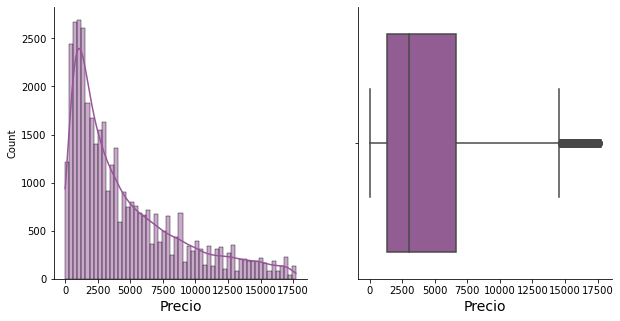

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# histogram
sns.histplot(x=venta_autos['price'], color='#99549c', kde=True, ax=ax[0])
ax[0].set_xlabel('Precio', size=14)

# boxplot
sns.boxplot(x=venta_autos['price'], color='#99549c', ax=ax[1])
ax[1].set_xlabel('Precio', size=14)

sns.despine()

CORRELACIÓN ENTRE VARIABLE NÚMERICA Y PRECIO

In [95]:
venta_autos.dtypes

price                  int64
abtest                object
yearOfRegistration     int64
gearbox               object
powerPS                int64
model                 object
kilometer              int64
fuelType              object
brand                 object
dtype: object

In [96]:
correlacion = venta_autos.select_dtypes(include=['int64']).corr()
correlacion

,price,yearOfRegistration,powerPS,kilometer
price,1.000000,0.113351,0.138636,-0.353949
yearOfRegistration,0.113351,1.000000,0.011115,-0.091441
powerPS,0.138636,0.011115,1.000000,0.016307
kilometer,-0.353949,-0.091441,0.016307,1.000000


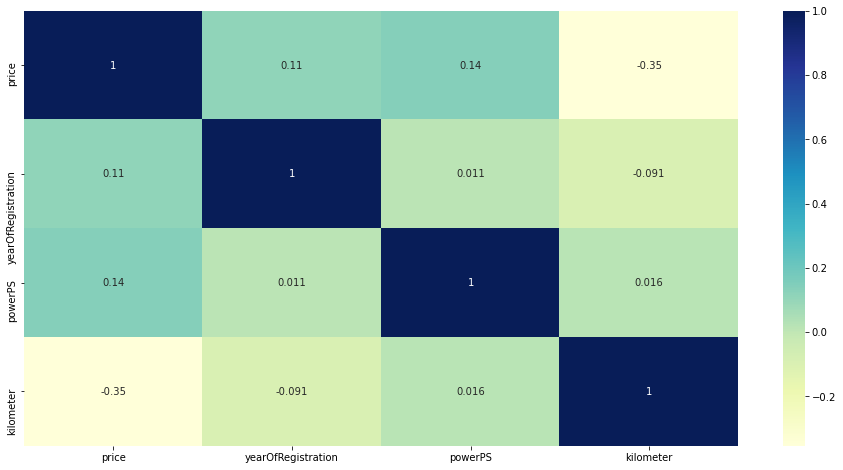

In [97]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(correlacion, cmap="YlGnBu", annot=True)
plt.show()

RELACIÓN ENTRE VARIABLES CATEGORICAS Y PRECIO

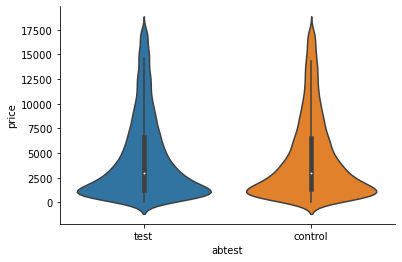

In [98]:
sns.violinplot(x='abtest', y='price', data=venta_autos)
sns.despine()

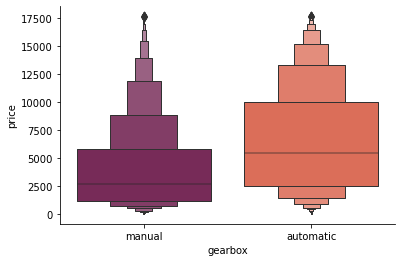

In [99]:
# boxplot gearbox
sns.boxenplot(x='gearbox', y='price', data=venta_autos, palette='rocket')
ax[1].set_xlabel('Tipo de caja', size=14)
ax[1].set_ylabel('Precio', size=14)

sns.despine()

[Text(0, 0, '3er'),
 Text(1, 0, 'xc_reihe'),
 Text(2, 0, 'touran'),
 Text(3, 0, 'ibiza'),
 Text(4, 0, 'passat'),
 Text(5, 0, 'astra'),
 Text(6, 0, 'clk'),
 Text(7, 0, 'vectra'),
 Text(8, 0, 'octavia'),
 Text(9, 0, 'a_klasse'),
 Text(10, 0, 'yaris'),
 Text(11, 0, 'meriva'),
 Text(12, 0, 'others'),
 Text(13, 0, 'golf'),
 Text(14, 0, '3_reihe'),
 Text(15, 0, 'carisma'),
 Text(16, 0, 'colt'),
 Text(17, 0, '80'),
 Text(18, 0, 'panda'),
 Text(19, 0, 'micra'),
 Text(20, 0, '156'),
 Text(21, 0, 'c_klasse'),
 Text(22, 0, '1er'),
 Text(23, 0, 'e_klasse'),
 Text(24, 0, 'polo'),
 Text(25, 0, 'a4'),
 Text(26, 0, 'almera'),
 Text(27, 0, 'forester'),
 Text(28, 0, 'cooper'),
 Text(29, 0, '5er'),
 Text(30, 0, 'a3'),
 Text(31, 0, 'voyager'),
 Text(32, 0, 'fiesta'),
 Text(33, 0, 'clio'),
 Text(34, 0, 'slk'),
 Text(35, 0, 'berlingo'),
 Text(36, 0, 'x_reihe'),
 Text(37, 0, 'fabia'),
 Text(38, 0, 'logan'),
 Text(39, 0, '500'),
 Text(40, 0, 'punto'),
 Text(41, 0, 's_klasse'),
 Text(42, 0, '2_reihe'),
 Text(4

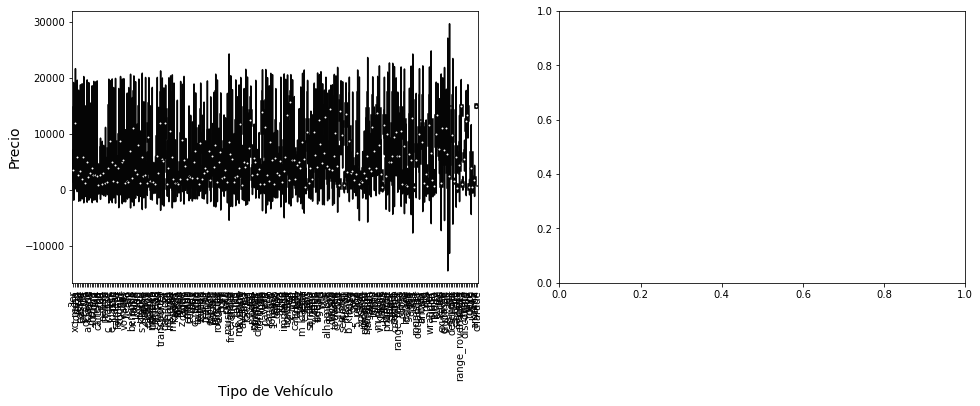

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
labels = venta_autos['model'].unique()
# violinplot
sns.violinplot(x="model", y="price", kind="swarm", data=venta_autos, ax=ax[0], palette='gnuplot')
ax[0].set_ylabel('Precio', size=14)
ax[0].set_xlabel('Tipo de Vehículo', size=14)
ax[0].set_xticklabels(labels, rotation=90)

Text(21.200000000000003, 0.5, 'Precio')

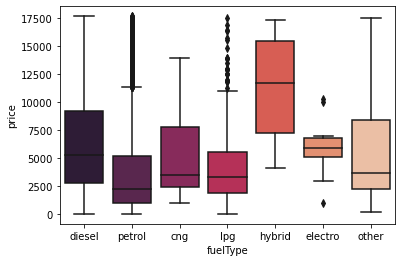

In [101]:
# boxplot
sns.boxplot(x='fuelType', y='price', data=venta_autos, palette='rocket')
ax[0].set_xlabel('Tipo de combustible', size=14)
ax[0].set_ylabel('Precio', size=14)

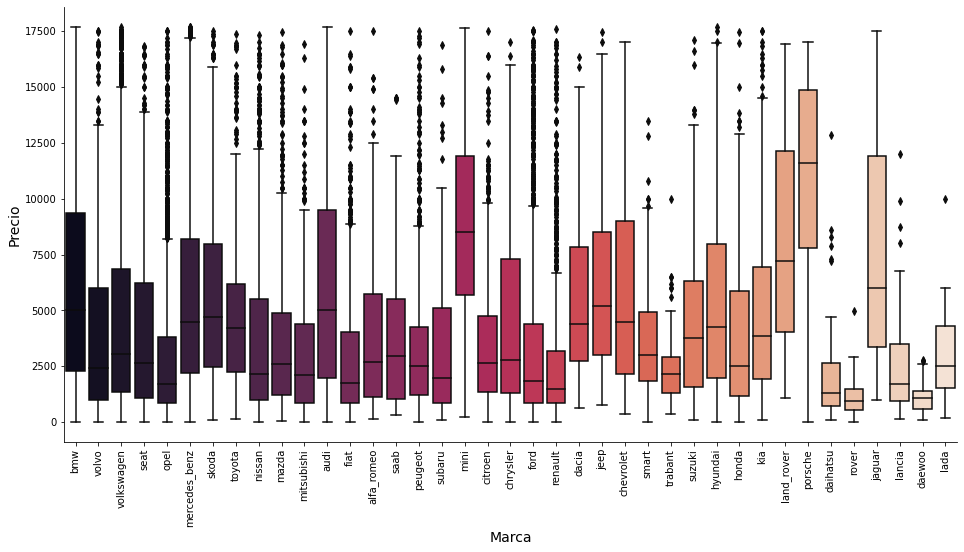

In [102]:
plt.figure(figsize=(16, 8))

# boxplot
sns.boxplot(x='brand', y='price', data=venta_autos, palette='rocket')
plt.xlabel('Marca', size=14)
plt.ylabel('Precio', size=14)
plt.xticks(rotation=90)
sns.despine()

TRANSFORMACIÓN DE VARIABLES

Escalado de valores

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [56]:
venta_autos[['yearOfRegistration', 'powerPS', 'kilometer']] = sc_X.fit_transform(venta_autos[['yearOfRegistration', 'powerPS', 'kilometer']])

In [57]:
venta_autos['price'] = sc_y.fit_transform(venta_autos[['price']])

Transformación de variables categoricas

In [58]:
venta_autos = pd.get_dummies(venta_autos, columns=['gearbox', 'brand', 'fuelType'])

In [59]:
venta_autos.head()

,price,abtest,yearOfRegistration,powerPS,model,kilometer,gearbox_automatic,gearbox_manual,brand_alfa_romeo,brand_audi,...,brand_trabant,brand_volkswagen,brand_volvo,fuelType_cng,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol
0,-0.028993,test,-0.020692,0.129416,3er,0.617990,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.084532,control,0.033382,0.190927,xc_reihe,0.617990,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,-0.045030,test,-0.020692,-0.102433,touran,0.617990,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,-0.028352,control,0.060419,-0.173407,ibiza,-1.678856,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.154463,test,0.114493,0.295022,xc_reihe,0.617990,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


#### Separando Train / Test

In [60]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x.
x_reg = venta_autos.drop(['price', 'abtest', 'model'], axis=1)

In [61]:
# Ahora selecciono las etiquetas y las guardo en y.
y_reg = venta_autos['price']

In [62]:
x_reg, y_reg = np.array(x_reg), np.array(y_reg)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_reg, y_reg, test_size=0.2, 
                                                    random_state=42)

In [65]:
from sklearn.svm import SVR

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [67]:
from numpy.lib.scimath import sqrt

#### Random Forest 

#### Support Vector Machine

In [68]:
svr = SVR()

In [69]:
param_grid = { 'C':[0.1, 1, 100],
              'kernel':['rbf', 'sigmoid', 'linear'],
              'gamma': [1, 0.1, 0.01]}

In [70]:
svc_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

In [ ]:
svc_search.fit(X_train_r, y_train_r)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.7min


#### Evaluación de los modelos